Chapter 20
# 圆形薄膜振荡模式
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
from scipy.special import jn, jn_zeros
import matplotlib.pyplot as plt
mmax = 5

def displacement(n, m, r, theta, mmax = 5):
    
    """
    鼓膜在极坐标系下的位移，
    其中
    n表示模式的正整数，
    m表示Bessel函数的阶数，
    r表示径向坐标，
    theta表示角坐标
    mmax 表示Bessel函数的最大阶数
    """

    # 计算Bessel函数Jn的零点，并选择其中第m个零点，将其赋值给变量k
    k = jn_zeros(n, mmax+1)[m]
    #  返回计算得到的鼓膜位移，该位移是正弦函数和Bessel函数的乘积
    return np.sin(n*theta) * jn(n, r*k)

# 极坐标
r = np.linspace(0, 1, 1001)
theta = np.linspace(0, 2 * np.pi, 1001)

# 极坐标转化为直角坐标，也可以用meshgrid()
xx = np.array([rr*np.cos(theta) for rr in r])
yy = np.array([rr*np.sin(theta) for rr in r])

In [2]:
def visualize(n,m,title):
    
    zz = np.array([displacement(n, m, rr, theta) for rr in r])
    
    fig = plt.figure(figsize = (8,4))
    ax = fig.add_subplot(121, projection='3d')
    
    surf = ax.plot_wireframe(xx,yy,zz, 
                             cstride = 50,
                             rstride = 50,
                             colors = '0.8',
                             linewidth=0.25) 
    ax.contour(xx,yy,zz, 
               cmap='RdYlBu_r',
               levels = 15,
               linewidths=1) 
    
    ax.set_proj_type('ortho')

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$f(x,y)$')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_zlim(zz.min()*5,zz.max()*5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.view_init(azim=15, elev=45)
    # ax.view_init(azim=-135, elev=60)
    plt.tight_layout()
    ax.grid(False)
    ax.axis('off')
    
    ax = fig.add_subplot(122)
    
    ax.contourf(xx,yy,zz, 
               cmap='RdYlBu_r',
               levels = 15) 
    ax.contour(xx,yy,zz, 
               colors = 'w',
               levels = 15,
               linewidths=0.25) 
    
    ax.plot(np.cos(theta),np.sin(theta),'k')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    ax.axis('off')    
    fig.savefig(title + '.svg')

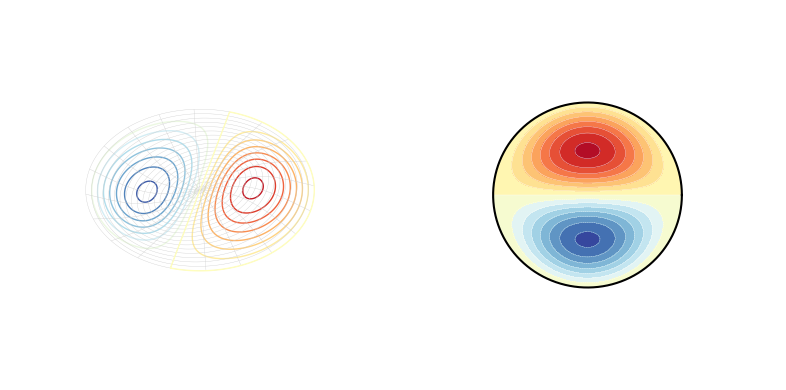

In [3]:
visualize(1,0,'1,0')

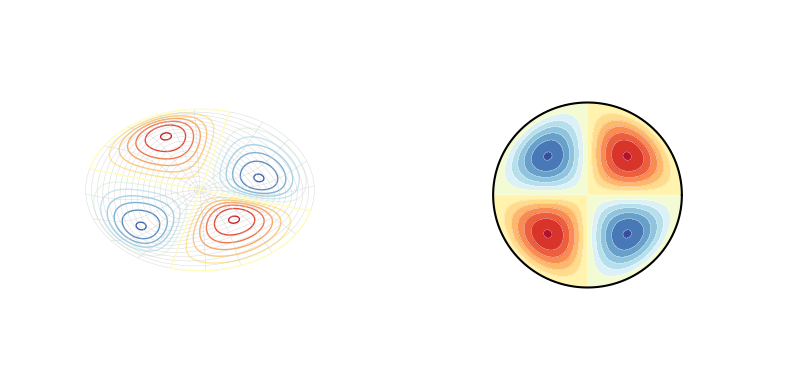

In [4]:
visualize(2,0,'2,0')

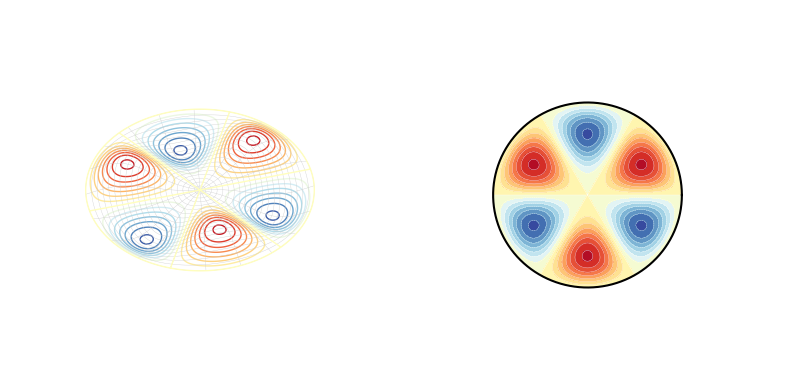

In [5]:
visualize(3,0,'3,0')

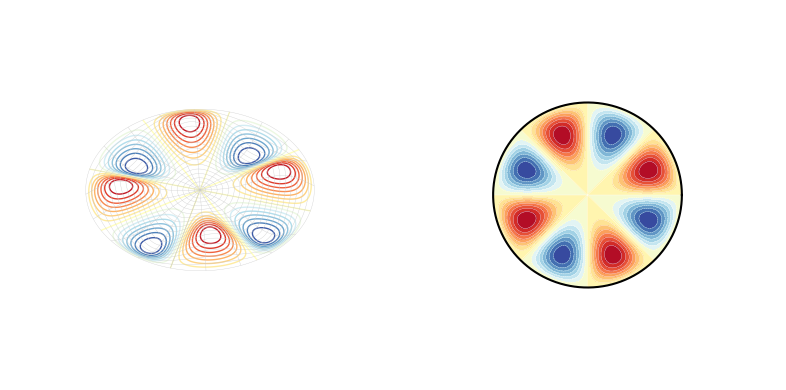

In [6]:
visualize(4,0,'4,0')

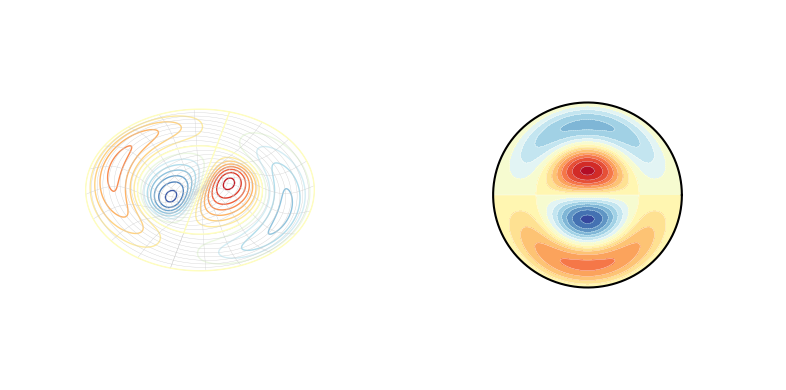

In [7]:
visualize(1,1,'1,1')

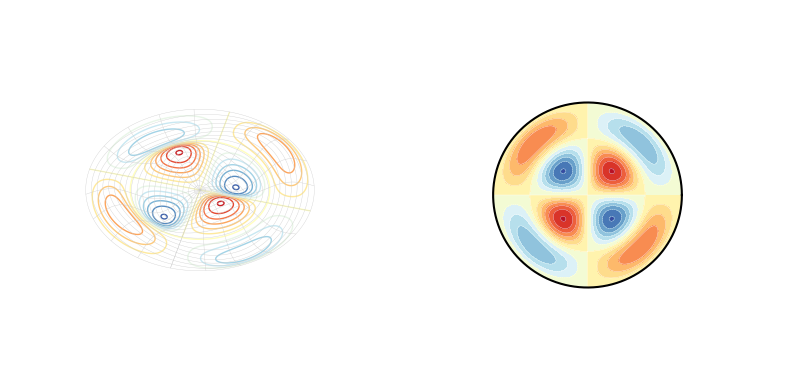

In [8]:
visualize(2,1,'2,1')

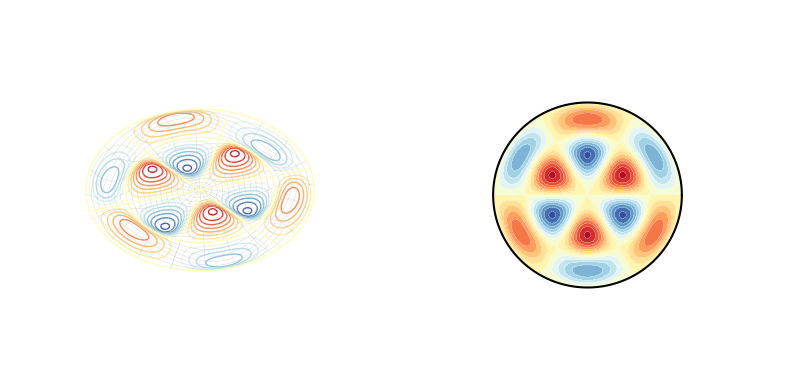

In [9]:
visualize(3,1,'3,1')

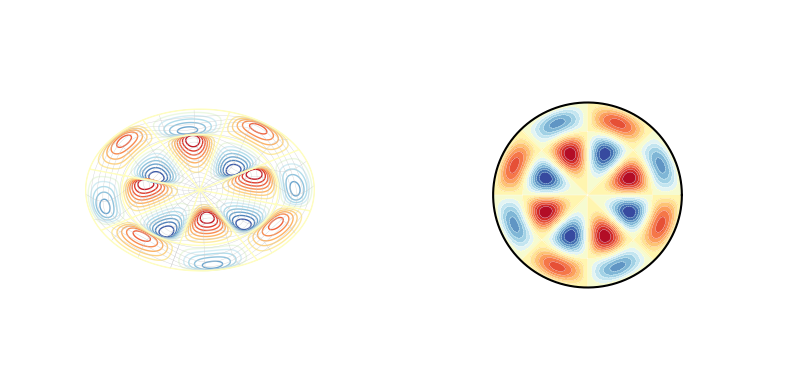

In [10]:
visualize(4,1,'4,1')

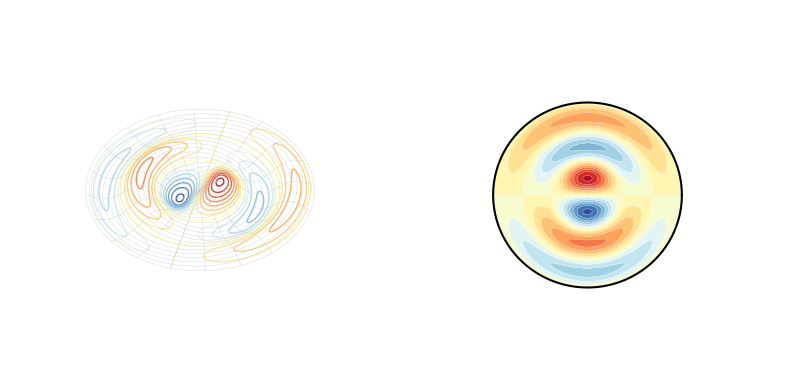

In [11]:
visualize(1,2,'1,2')

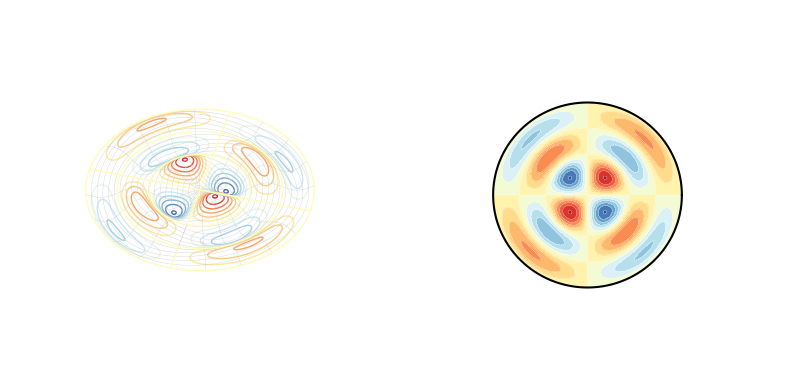

In [12]:
visualize(2,2,'2,2')

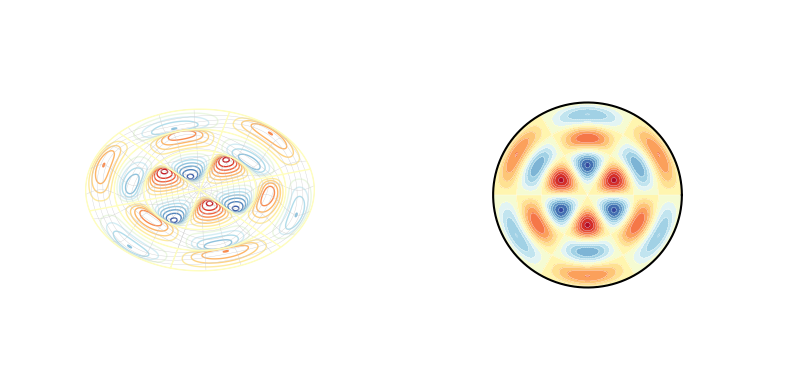

In [13]:
visualize(3,2,'3,2')

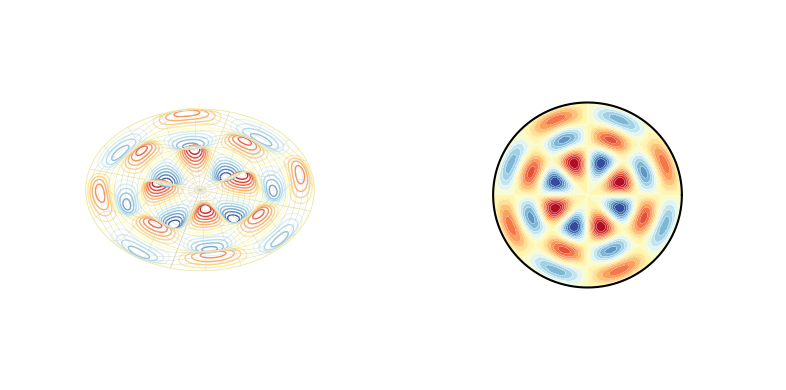

In [14]:
visualize(4,2,'4,2')

参考：  
https://mathematica.stackexchange.com/questions/56698/circular-membrane-vibration-simulation  
https://scipython.com/book2/chapter-8-scipy/examples/drum-vibrations-with-bessel-functions/  
https://www.acs.psu.edu/drussell/demos/membranecircle/circle.html